In [1]:
# Beginning of "eda.ipynb"

# Exploratory Data Analysis

The following is the data analysis done after the first part of the project which was to create synthetic data that represents a transportation problem. Want to explore the results of said dataset.

In [2]:
# Import necessary libraries and modules
import yaml # Read config files
import time
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 10)
from sqlalchemy import create_engine

## Section 1: Query Data from Database
### Establish a database connection using SQLAlchemy

In [3]:
# Read the configuration file
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)
# Load credentials into variables
dbname=config["database"]["name"]
user=config["server"]["user"]
password=config["server"]["password"]
host=config["server"]["host"]
port=config["server"]["port"]
# Replace with your PostgreSQL credentials and database details
db_connection_str = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}"
# Create the engine
db_connection = create_engine(db_connection_str)
# Table name
tbl_name = 'transportation_problem'
start_time = time.time() # get start time before insert
try:
    # Read a whole table
    df_table = pd.read_sql_table(
        tbl_name,
        con=db_connection
    )
    print("Table successfully read from PostgreSQL!")
except Exception as e:
    print(f"Error reading the table from PostgreSQL database: {e}")
# Ensure cleanup tasks are performed
finally: db_connection.dispose()
end_time = time.time() # get end time after insert
total_time = end_time - start_time # calculate the time
print(f"Read time: {total_time:.3f} seconds") # print time

Table successfully read from PostgreSQL!
Read time: 0.316 seconds


In [4]:
# To see the demand
df_table.tail(15)
# To see production capacity
# df_table.head(15)

,index,customer_1,customer_2,customer_3,customer_4,...,customer_122,customer_123,customer_124,customer_125,production_capacity
61,factory_62,5,12,10,2,...,5,2,12,2,500.0
62,factory_63,4,3,8,14,...,1,15,13,12,750.0
63,factory_64,4,5,10,11,...,2,5,3,4,375.0
64,factory_65,2,11,12,14,...,14,5,15,7,375.0
65,factory_66,14,1,11,10,...,5,1,9,15,250.0
...,...,...,...,...,...,...,...,...,...,...,...
71,factory_72,10,9,8,14,...,5,13,6,7,250.0
72,factory_73,10,13,7,12,...,13,11,1,2,125.0
73,factory_74,13,11,3,12,...,10,5,7,1,750.0
74,factory_75,1,8,14,13,...,3,6,13,2,750.0


Want a subset that removes the final row and column which is the demand and production capacity, respectively.

In [5]:
trans_costs = df_table.iloc[:-1, 1:-1]
trans_costs.head(15)

,customer_1,customer_2,customer_3,customer_4,customer_5,...,customer_121,customer_122,customer_123,customer_124,customer_125
0,3,15,3,11,6,...,6,14,5,2,1
1,11,8,8,6,15,...,10,2,2,1,13
2,15,11,14,6,1,...,3,14,8,7,5
3,11,4,14,10,15,...,2,2,2,5,7
4,6,8,7,5,13,...,4,15,6,11,10
...,...,...,...,...,...,...,...,...,...,...,...
10,2,7,14,12,7,...,5,8,14,11,10
11,3,14,5,13,8,...,15,9,13,2,13
12,2,11,15,8,5,...,7,11,7,13,10
13,2,10,4,3,8,...,5,15,1,9,7


## Section 2: Metrics for the Dashboard
Want to gather the number of customers and number of factories.

In [6]:
num_of_plants = len(trans_costs.index)
print(f"The number of factories: {num_of_plants}")

The number of factories: 75


In [7]:
# Get the number of plants
num_of_customers = len(trans_costs.columns)
print(f"The number of customers: {num_of_customers}")

The number of customers: 125


Wanted a random subset of 15 customers to perform some analysis.

In [8]:
# Randomly select 15 columns
n_cols = 15
df2 = trans_costs.sample(
    n = n_cols,
    axis = 1
)
df2

,customer_26,customer_22,customer_102,customer_100,customer_28,...,customer_1,customer_57,customer_2,customer_69,customer_110
0,14,9,12,9,3,...,3,15,15,1,1
1,9,3,1,12,14,...,11,14,8,11,6
2,6,15,8,7,7,...,15,1,11,3,12
3,1,14,13,3,11,...,11,2,4,10,14
4,1,8,8,14,5,...,6,15,8,4,8
...,...,...,...,...,...,...,...,...,...,...,...
70,6,2,14,3,13,...,6,4,14,4,15
71,14,1,13,15,6,...,10,5,9,10,8
72,11,3,5,5,1,...,10,12,13,14,5
73,10,11,3,4,4,...,13,8,11,8,15


## Section 3: Plotting EDA

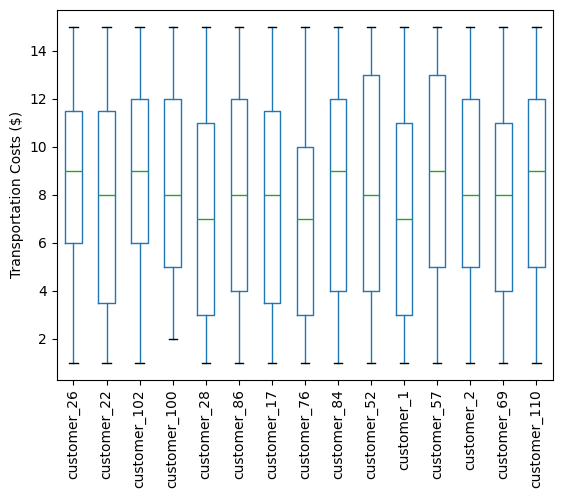

In [9]:
import matplotlib.pyplot as plt
df2.boxplot()
ax = plt.subplot()
ax.set_ylabel("Transportation Costs ($)")
# Hide grid lines
plt.grid(False)
plt.xticks(rotation=90)
plt.show()

In [10]:
trans_costs.mean()

customer_1      7.520000
customer_2      8.240000
customer_3      8.173333
customer_4      8.906667
customer_5      8.386667
                  ...   
customer_121    8.360000
customer_122    8.133333
customer_123    7.853333
customer_124    7.866667
customer_125    6.880000
Length: 125, dtype: float64

Will extract the demand and production capacity as Pandas Dataframe to get an instagram.

In [47]:
# Extract the demand row into its own Pandas Series
# demand = df_table.iloc[:,-1]
demand = df_table.iloc[-1,:]
type(demand)

pandas.core.series.Series

In [48]:
demand = demand.reset_index()
# print(demand)
# print((df_table.iloc[75]).size)
print(demand.shape)

(127, 2)


In [49]:
print(demand.iloc[:,-1])

0      demand
1         130
2         120
3         120
4         130
        ...  
122       160
123       220
124       160
125        80
126       NaN
Name: 75, Length: 127, dtype: object


In [50]:
demand = demand.iloc[:,-1]
demand = demand[1:-1]
print(demand)

1      130
2      120
3      120
4      130
5       50
      ... 
121    230
122    160
123    220
124    160
125     80
Name: 75, Length: 125, dtype: object


Now, want to create a histogram from the Pandas Series.

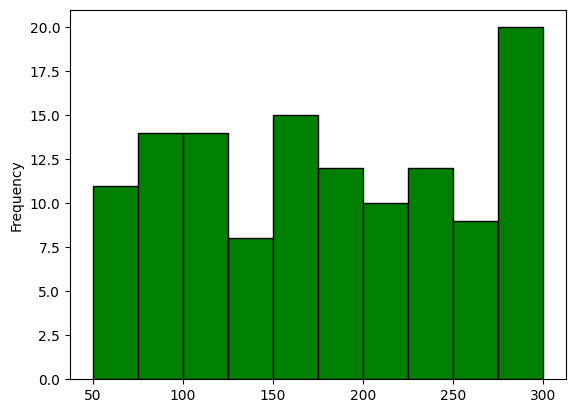

In [51]:
# For density histogram
# demand.plot(kind='hist', density=True)
demand.plot(kind='hist', color = 'green', edgecolor='black', bins=10)
plt.show()

In [18]:
# Pull the last column which is the production capacity
prod_cap = df_table.iloc[:,-1]
# Remove NA's
prod_cap = prod_cap.dropna()
# Turn data type from float to integer
prod_cap = prod_cap.astype(int)
print(prod_cap)

0     625
1     375
2     250
3     750
4     375
     ... 
70    750
71    250
72    125
73    750
74    750
Name: production_capacity, Length: 75, dtype: int64


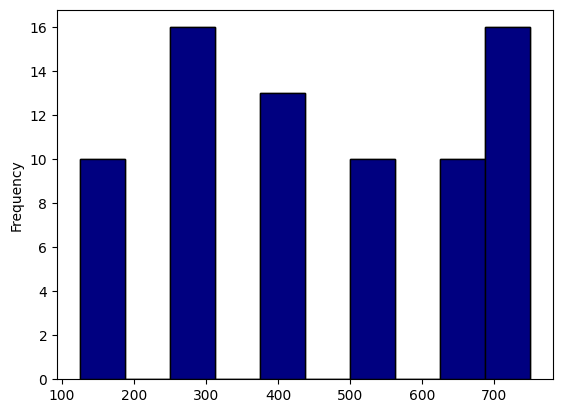

In [21]:
# Histogram plot
prod_cap.plot(kind='hist', color = 'navy', edgecolor='black', bins=10)
plt.show()

## Conclusion

So was able to determine some metrics and plots including boxplots and histograms to give an initial view of the synthetic data for the transportation problem.

In [13]:
# End of "eda.ipynb"